#Задание 1

##Написать функцию для скрейпинга веб-страниц

In [1]:
import os
import requests
from bs4 import BeautifulSoup
import re

In [2]:
def scrape_text_from_url(url, tag, class_=None): 

    response =  requests.get(url) #выполните HTML-запрос
    if response.status_code == 200: #если запрос успешный (возвращается значение 200)
        soup = BeautifulSoup(response.text, 'html.parser') # парсим контент или текст с помощью BeautifulSoup html.parser 
        paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег

        text = ''
        for p in paragraphs:
            text += p.get_text() # извлекаем тектовые данные с использованием list comprehension  
        return text 

    else:
        print(f"Запрос не удался. Статус: {response.status_code}") # выводим статус-код и сообщение об ошибке 
    

In [3]:
scrape_text_from_url(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p')

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\nThe general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization of transformational-generative grammar (TGG).[1] Marcel-Paul Schützenberger also played a role in the development of the theory of formal languages; the paper "The algebraic theory of context free languages"[2] describes the modern hierarchy, including context-free grammars.[3]\nIndependently, alongside li

In [4]:
scrape_text_from_url(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text')

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital fakeness is there to get the audience used to it...Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.The film isn’t very deep, but it d

In [5]:
## Задание 2 Написать функцию для сентимент-анализа

In [6]:
with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

Создайте списки слов, разделив строку по знаку \n

In [7]:
pos_list, neg_list = pos.split('\n'), neg.split('\n')

print(pos_list[:10])  # Вывод первых 10 положительных слов

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']


In [8]:
import spacy 
nlp = spacy.load('en_core_web_sm')

In [9]:
def analyze_sentiment(text, positive_words, negative_words):
    
    lower_text = text.lower()
    doc = nlp(lower_text)
    words = [token.text for token in doc if token.is_stop != True] 

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
        return 'positive'
    if positive_count < negative_count:
        return 'negative' 
    else:
        return 'neutral' 

In [10]:
analyze_sentiment('This sample text is awesome!', pos_list, neg_list)

'positive'

In [11]:
analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [12]:
analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

## Задача 3

In [13]:
# Допишите функцию для вывода скоров по заданному URL

def analyze(positive_words, negative_words, url, tag, class_=None):
    scraped_text = scrape_text_from_url(url, tag)
    sentences =  scraped_text.split('.')
    sentiments = []

    for sent in sentences:
       sentiments.append(analyze_sentiment(sent, positive_words, negative_words))
    return sentiments
        

In [14]:
analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative']

In [15]:
analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral']

## Задача 4

In [16]:
from collections import Counter

In [17]:
sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1

Counter({'negative': 26, 'neutral': 12, 'positive': 6})

In [18]:
import numpy as np
import pandas as pd

In [19]:
import matplotlib.pyplot as plt

In [20]:
my_sample1 = Counter(analyze(url='https://www.theguardian.com/film/2019/sep/26/the-goldfinch-review', tag='p', positive_words=pos, negative_words=neg))
my_sample2 = Counter(analyze(url = 'https://www.buzzmag.co.uk/the-goldfinch-film-review/', tag='p',positive_words=pos, negative_words=neg))

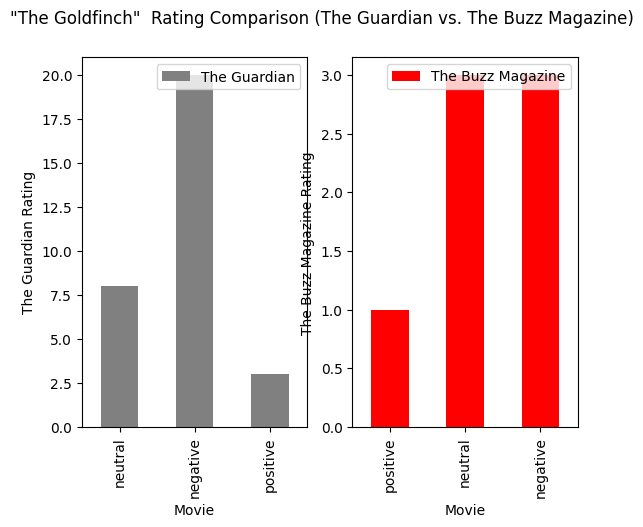

In [21]:
df1 = pd.DataFrame.from_dict(my_sample1, orient='index', columns=['The Guardian'])
df2 = pd.DataFrame.from_dict(my_sample2, orient='index', columns=['The Buzz Magazine'])
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1 = df1.plot.bar(ax=ax1, color = 'grey')
ax2 = df2.plot.bar(ax=ax2, color='red')

plt.suptitle('"The Goldfinch"  Rating Comparison (The Guardian vs. The Buzz Magazine)')  # Set title

ax1.set_xlabel('Movie')
ax1.set_ylabel('The Guardian Rating')
ax2.set_xlabel('Movie')
ax2.set_ylabel('The Buzz Magazine Rating')

plt.show()

## Задача 5

In [23]:
def scrape_text_from_url(url, tag, class_=None):     
    response =  requests.get(url) #выполните HTML-запрос    
    print(f'Successful: {response}') # проверяем запрос  
    print()
    
    try:      
        response.raise_for_status() #  метод raise_for_status из библиотеки requests вызовет HTTPError, если в запросе HTTP возникнет статус код ошибки.
        soup = BeautifulSoup(response.text, 'html.parser')     
        paragraphs = soup.find_all(tag, class_)   
        text = ''                
        
        for p in paragraphs:    
            text += p.get_text()

        # Сделаем текст чуть более читабельным 
        text = re.sub(r'\s+', ' ', text)  # убираем лишние пробелы с помощью регулярки         

        return text     
        
    except requests.exceptions.HTTPError as error:      
        print(f'Ошибка HTTP-запроса: {error}')    
    except Exception as error:     
        print(f"Неизвестная ошибка: {error}") 
        
def analyze_sentiment(text, positive_words, negative_words):
    doc = nlp(text.lower()) 
    words = [token.text for token in doc if token.is_stop != True]
    
    print(words) # проверим список токенов на наличие стоп-слов и нижнего регистра
    print()
    
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    return 'positive' if positive_count > negative_count else 'negative' if negative_count > positive_count else 'neutral' # вёрнем строчку positive, negative или neutralв зависимости выполнении условия 

def analyze(positive_words, negative_words, url, tag, class_=None):
    scraped_text = scrape_text_from_url(url, tag, class_)
    sentences = scraped_text.split('.')
    
    print('Ниже представленны списки токенов в предложениях очищенные от стоп-слов и приведенные к нижнему регистру:\n')
    
    sentiments = [analyze_sentiment(sent, positive_words, negative_words) for sent in sentences]

    return sentiments

sentiments = analyze(url='https://www.theguardian.com/film/2019/sep/26/the-goldfinch-review', tag='p', positive_words=pos, negative_words=neg)[:10]
sentiments_counter = Counter(sentiments)

print('Sentiments:')
print(sentiments)

print()

print('Sentiments Counter:')
print(sentiments_counter)

Successful: <Response [200]>

Ниже представленны списки токенов в предложениях очищенные от стоп-слов и приведенные к нижнему регистру:

['nicole', 'kidman', 'fine', 'cameo', 'save', 'infuriating', 'adaptation', 'renders', 'complex', 'novel', 'broad', 'brushstrokes', 'despite', '-', 'list', 'talent', 'camera', ',', 'gone', 'worryingly', 'wrong', 'adaptation', 'donna', 'tartt', 'pulitzer', '-', 'winning', 'novel', '2013', ',', 'directed', 'john', 'crowley']

[' ', 'book', 'unwieldy', 'digressive', 'aspects', 'hypnotised', 'film', '-', 'makers', ',', 'want', 'justice', 'writerly', 'aspects', 'tartt', 'extravagant', 'dickensian', 'adventure', ',', 'fetishistic', 'connoisseur', 'detail']

[' ', 'mislaid', 'underplayed', 'straightforwardly', 'exciting', 'set', 'pieces', 'voltage', 'film']

['film', 'co', '-', 'financed', 'amazon', 'studios', 'maybe', 'worked', 'better', '-', 'tv', 'drama']

[' ', ',', 'story', 'effortfully', 'squeezed', 'half', 'hours', ',', 'key', 'moments', 'suddenly', 'w